In [3]:
#importing models
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
from matplotlib import rcParams
#importing sklearn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from path import Path

In [4]:

import warnings
warnings.filterwarnings("ignore")

In [7]:
# defining data path
data_path=Path('resources/Cleaned_folder/aqi_asthma.csv')
# Reading data source using pandas
asthma_df=pd.read_csv(data_path)

In [20]:
asthma_df.dtypes

Year                                  int64
Age_Group                             int64
county                               object
Number_of_Asthma_ED_Visits          float64
Age_Adjusted_Rate_of_Asthma_ED_V    float64
NO2 AQI_mean                        float64
NO2 AQI_max                         float64
NO2 AQI_min                         float64
O3 AQI_mean                         float64
O3 AQI_max                          float64
O3 AQI_min                          float64
SO2 AQI_mean                        float64
SO2 AQI_max                         float64
SO2 AQI_min                         float64
CO AQI_mean                         float64
CO AQI_max                          float64
CO AQI_min                          float64
dtype: object

In [21]:
# create feature matrix (X)
#selecting all columns except 'Age-adjusted-rate'
X=asthma_df.drop(['Age_Adjusted_Rate_of_Asthma_ED_V','county'], axis=1) 

# create response vector (y)
##selecting 'Age-adjusted-rate'
y=asthma_df['Age_Adjusted_Rate_of_Asthma_ED_V'].values  

#### Splitting data in train and test set

In [22]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
#Also using train_index and test_index to get train and test data index 
X_train, X_test, y_train, y_test = train_test_split(
                               X, y, test_size=0.2, random_state=42)

In [23]:
print(f'Shape of X_train={X_train.shape}')
print(f'Shape of X_test={X_test.shape}')
print(f'Shape of y_train={y_train.shape}')
print(f'Shape of X_test={y_test.shape}')

Shape of X_train=(83, 15)
Shape of X_test=(21, 15)
Shape of y_train=(83,)
Shape of X_test=(21,)


#### Scaling using standard scaler on feature matrix (X) 

In [24]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X_train=std_scaler.fit_transform(X_train)
scaled_X_test=std_scaler.transform(X_test)

In [25]:
#shape of the X and y
print(scaled_X_train.shape)
print(y.shape)

(83, 15)
(104,)


### Evaluation Metric

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

The most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).
- **Mean squared error**: The average squared distance between the prediction and the correct answer (a "loss function," as lower is better).
- **Mean absolute error**: The average absolute distance between the prediction and the correct answer (a "loss function," as lower is better).

In this case, we'll use mean squared error, R2, and mean absolute error because it is more interpretable in a predictive context.

## Linear Regression

In [26]:
#using linear regression
# Make a linear regression instance
lr=LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(scaled_X_train, y_train)


LinearRegression()

In [84]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing  set  {lr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.8187233825511082
R2 Score of testing  set  0.8590207162163466


#### Create a cross-valiation with five folds.
-  Cross valiation allows the training set into distinct subsets called folds.
- A model is trained using k-1 of the folds as training data

In [85]:
#score of training set using cross_val_score
cross_val_score(lr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

array([-12.18150373, -13.01962261, -14.08140065, -14.40623236,
       -12.7821553 ])

In [86]:
#score of training set using cross_val_score
lr_r2=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Linear Regression is {lr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_mse=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_rmse=np.sqrt(-(lr_mse))
print(f'The mean squared error of Linear Regression is {lr_rmse}')

#mean absolute error
lr_mae=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_mae=(-(lr_mae))
print(f'The mean absolute error of Linear Regression is {lr_mae}')

The R2 of Linear Regression is 0.48817169182285447
The mean squared error of Linear Regression is 16.85909268459506
The mean absolute error of Linear Regression is 13.294182929913623


## Ridge Regression

In [87]:
#using ridge regression(ridge make some features going to near zero)
#alpha=0 no regularization( all features are used)
# Make a ridge regression instance
lr_r=Ridge()
lr_r.fit(scaled_X_train, y_train)


Ridge()

In [88]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_r.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_r.score(scaled_X_test, y_test)}')

R2 Score of training set 0.814320407949326
R2 Score of testing set  0.8647024989632942


#### Create a cross-valiation with five folds.

In [32]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-11.26694862, -13.02570106, -15.81391099])

In [33]:
#score of training set using cross_val_score
lr_r_r2=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression is {lr_r_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_r_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_r_rmse=np.sqrt(-(lr_r_mse))
print(f'The mean squared error of Ridge Regression is {lr_r_rmse}')

#mean absolute error
lr_r_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_r_mae=(-(lr_r_mae))
print(f'The mean absolute error of Ridge Regression is {lr_r_mae}')

The R2 of Ridge Regression is 0.5190225440234283
The mean squared error of Ridge Regression is 16.67797198033198
The mean absolute error of Ridge Regression is 12.573961515804765


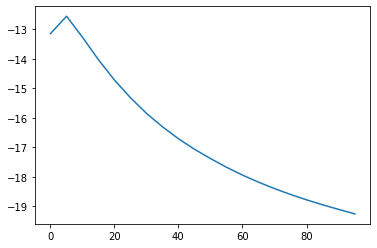

In [34]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,1000,50):
    alpha.append(i/10)
    lrr=Ridge(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrr, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [35]:
#choosing the best alpha (look figure where alpha start to saturate)
lrr=Ridge(alpha=10)
lrr.fit(X_train, y_train)


Ridge(alpha=10)

In [36]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 40 {lrr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 40 {lrr.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 40 -4369.043902778573
R2 Score of testing set with alpha 40 -3041.1788073850216


#### Create a cross-valiation with five folds.

In [37]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-11.26694862, -13.02570106, -15.81391099])

In [38]:
#score of training set using cross_val_score
lrr_r2=np.mean(cross_val_score(lrr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression with alpha 10 is {lrr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrr_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrr_rmse=np.sqrt(-(lrr_mse))
print(f'The mean squared error of Ridge Regression with alpha 10 is {lrr_rmse}')

#mean absolute error
lrr_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrr_mae=(-(lrr_mae))
print(f'The mean absolute error of Ridge Regression with alpha 10 is {lrr_mae}')

The R2 of Ridge Regression with alpha 10 is 0.5538084409345555
The mean squared error of Ridge Regression with alpha 10 is 16.67797198033198
The mean absolute error of Ridge Regression with alpha 10 is 12.573961515804765


## Laso Regression

In [39]:
#using lassoregression(lasso make some features going to exactly zero)
#alpha=0 no regularization( all features are used)
# Make a lasso regression instance
lr_l=Lasso()
lr_l.fit(scaled_X_train, y_train)


Lasso()

In [40]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_l.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_l.score(scaled_X_test, y_test)}')

R2 Score of training set 0.7488283842876851
R2 Score of testing set  0.7701611905503272


#### Create a cross-valiation with five folds.

In [41]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-10.80297702, -13.94631581, -12.85551078])

In [91]:
#score of training set using cross_val_score
lr_l_r2=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=2))
print(f'The R2 of Lasso Regression is {lr_l_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_l_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_l_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Lasso Regression is {lr_l_rmse}')

#mean absolute error
lr_l_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_l_mae=(-(lr_l_mae))
print(f'The mean absolute error of Lasso Regression is {lr_l_mae}')

The R2 of Lasso Regression is 0.6329144771147857
The mean squared error of Lasso Regression is 17.601576254338745
The mean absolute error of Lasso Regression is 12.521245242774901


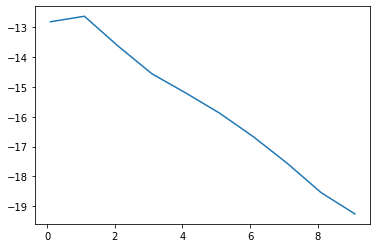

In [43]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,100,10):
    alpha.append(i/10)
    lrl=Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrl, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [44]:
#choosing the best alpha
lrl=Lasso(alpha=10)
lrl.fit(scaled_X_train, y_train)


Lasso(alpha=10)

In [45]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 10 {lrl.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 10 {lrl.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 10 0.30267850496357285
R2 Score of testing set with alpha 10 0.28237914152090693


#### Create a cross-valiation with five folds.

In [46]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-10.80297702, -13.94631581, -12.85551078])

In [47]:
#score of training set using cross_val_score
lrl_r2=np.mean(cross_val_score(lrl, scaled_X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression with alpha 10 is {lrl_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrl_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrl_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Lasso Regression with alpha 10 is {lrl_rmse}')

#mean absolute error
lrl_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrl_mae=(-(lrl_mae))
print(f'The mean absolute error of Lasso Regressionwith alpha 10 is {lrl_mae}')

The R2 of Lasso Regression with alpha 10 is 0.19788197709315403
The mean squared error of Lasso Regression with alpha 10 is 17.601576254338745
The mean absolute error of Lasso Regressionwith alpha 10 is 12.521245242774901


## Support Vector Machine(SVM) Regression

In [48]:
# Make a svm regression instance
svm=LinearSVR(epsilon=1.5)
svm.fit(scaled_X_train, y_train)


LinearSVR(epsilon=1.5)

In [49]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svm.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svm.score(scaled_X_test, y_test)}')

R2 Score of training set 0.39508206437493754
R2 Score of testing set  0.4497650118953762


#### Create a cross-valiation with five folds.

In [50]:
#score of training set using cross_val_score
cross_val_score(svm, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-28.38869445, -22.81243913, -32.6465356 ])

In [51]:
#score of training set using cross_val_score
svm_r2=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5))
print(f'The R2 of svm Regression is {svm_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svm_mse=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svm_rmse=np.sqrt(-(svm_mse))
print(f'The mean squared error of svm Regression is {svm_rmse}')

#mean absolute error
svm_mae=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svm_mae=(-(svm_mae))
print(f'The mean absolute error of svm Regression is {svm_mae}')

The R2 of svm Regression is -0.2497625712795674
The mean squared error of svm Regression is 31.262314160824626
The mean absolute error of svm Regression is 22.804066594286144


## Support Vector Machine(SVR) Kernel Regression

In [52]:
# Make a svm regression instance
svr=SVR(kernel='linear')
svr.fit(scaled_X_train, y_train)


SVR(kernel='linear')

In [53]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.6560044126021761
R2 Score of testing set  0.6971531026611963


#### Create a cross-valiation with five folds.

In [54]:
#score of training set using cross_val_score
cross_val_score(svr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-14.45240362, -16.08003476, -15.26700429])

In [55]:
#score of training set using cross_val_score
svr_r2=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5))
print(f'The R2 of svr is {svr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svr_mse=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svr_rmse=np.sqrt(-(svr_mse))
print(f'The mean squared error of svr is {svr_rmse}')

#mean absolute error
svr_mae=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svr_mae=(-(svr_mae))
print(f'The mean absolute error of svr  is {svr_mae}')

The R2 of svr is 0.5139168530443536
The mean squared error of svr is 21.14974312582804
The mean absolute error of svr  is 14.799399460341936


## Decision Tree

In [56]:
# Make a decision tree instance
dt=DecisionTreeRegressor()
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [57]:
#Printing the score of test and train set
print(f'R2 Score of training set {dt.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {dt.score(scaled_X_test, y_test)}')

R2 Score of training set 1.0
R2 Score of testing set  0.7839349437476085


#### Create a cross-valiation with five folds.

In [58]:
#score of training set using cross_val_score
cross_val_score(dt, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-12.59084624, -15.54323722, -17.91830322])

In [59]:
#score of training set using cross_val_score
dt_r2=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5))
print(f'The R2 of Decision Tree Regressor is {dt_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
dt_mse=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
dt_rmse=np.sqrt(-(dt_mse))
print(f'The mean squared error of Decision Tree Regressor is {dt_rmse}')

#mean absolute error
dt_mae=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
dt_mae=(-(dt_mae))
print(f'The mean absolute error of Decision Tree Regressor is {dt_mae}')

The R2 of Decision Tree Regressor is 0.5953934829548357
The mean squared error of Decision Tree Regressor is 17.650669643207003
The mean absolute error of Decision Tree Regressor is 12.144976507373887


### Tuning hyperparamaters  using Grid Search CV

In [60]:
parameters = {
              'max_depth':[6, 8,12],
              'min_samples_leaf':range(1,5)}
gs_dt=GridSearchCV(dt, param_grid=parameters, 
                    cv=3, verbose=1, n_jobs=-1)
gs_dt.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [61]:
#Best parameters
gs_dt.best_params_

{'max_depth': 12, 'min_samples_leaf': 3}

In [62]:
#best estimator
dt_b=gs_dt.best_estimator_
dt_b

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3)

In [63]:
#Printing the score of test and train set
dt_tr=dt_b.score(scaled_X_train, y_train)
dt_te=dt_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {dt_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {dt_te}')

R2 Score of training set after hyperpar tuining 0.9613499441459871
R2 Score of testing set after hyperpar tuining  0.7905140960979169


In [64]:
#dataframe for results
dt_df=pd.DataFrame(gs_dt.cv_results_)
dt_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000893,0.000022,0.000517,0.000002,6,1,"{'max_depth': 6, 'min_samples_leaf': 1}",0.650560,0.454518,0.443423,0.516167,0.095138,12
1,0.000896,0.000027,0.000547,0.000023,6,2,"{'max_depth': 6, 'min_samples_leaf': 2}",0.605647,0.601175,0.385572,0.530798,0.102707,11
2,0.000711,0.000071,0.000454,0.000064,6,3,"{'max_depth': 6, 'min_samples_leaf': 3}",0.711139,0.554121,0.643152,0.636137,0.064294,6
3,0.000688,0.000031,0.000468,0.000003,6,4,"{'max_depth': 6, 'min_samples_leaf': 4}",0.653774,0.554138,0.759628,0.655847,0.083904,3
4,0.000766,0.000010,0.001420,0.001223,8,1,"{'max_depth': 8, 'min_samples_leaf': 1}",0.665404,0.483661,0.594600,0.581222,0.074797,8
5,0.000691,0.000006,0.000472,0.000008,8,2,"{'max_depth': 8, 'min_samples_leaf': 2}",0.606669,0.536091,0.620258,0.587673,0.036893,7
6,0.000663,0.000035,0.000470,0.000033,8,3,"{'max_depth': 8, 'min_samples_leaf': 3}",0.711139,0.556304,0.643152,0.636865,0.063367,5
7,0.000653,0.000051,0.000463,0.000051,8,4,"{'max_depth': 8, 'min_samples_leaf': 4}",0.653774,0.554138,0.767558,0.658490,0.087192,2
8,0.000747,0.000017,0.000439,0.000008,12,1,"{'max_depth': 12, 'min_samples_leaf': 1}",0.653402,0.461075,0.523088,0.545855,0.080151,10
9,0.000677,0.000027,0.000455,0.000007,12,2,"{'max_depth': 12, 'min_samples_leaf': 2}",0.606521,0.464592,0.575129,0.548747,0.060871,9


In [65]:
#printing the evaluation scores
cvres_dt=gs_dt.cv_results_
for mean_score, params in zip(cvres_dt['mean_test_score'], cvres_dt['params']):
    print((mean_score), params)

0.5161666129081679 {'max_depth': 6, 'min_samples_leaf': 1}
0.5307977285352904 {'max_depth': 6, 'min_samples_leaf': 2}
0.6361373072429077 {'max_depth': 6, 'min_samples_leaf': 3}
0.6558470491350702 {'max_depth': 6, 'min_samples_leaf': 4}
0.581221803928772 {'max_depth': 8, 'min_samples_leaf': 1}
0.5876725208463119 {'max_depth': 8, 'min_samples_leaf': 2}
0.6368649761939776 {'max_depth': 8, 'min_samples_leaf': 3}
0.6584903884368786 {'max_depth': 8, 'min_samples_leaf': 4}
0.5458548662173023 {'max_depth': 12, 'min_samples_leaf': 1}
0.5487471623990093 {'max_depth': 12, 'min_samples_leaf': 2}
0.6667272732461086 {'max_depth': 12, 'min_samples_leaf': 3}
0.6558470491350702 {'max_depth': 12, 'min_samples_leaf': 4}


## Random Forest

In [66]:
# Make a Random forest instance
rf=RandomForestRegressor()
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [67]:
#Printing the score of test and train set
print(f'R2 Score of training set {rf.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set {rf.score(scaled_X_test, y_test)}')

R2 Score of training set 0.9770492890851423
R2 Score of testing set 0.8756342808641262


#### Create a cross-valiation with five folds.

In [68]:
#score of training set using cross_val_score
cross_val_score(rf, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-10.82831773, -12.2809754 ,  -9.87549159])

In [69]:
#score of training set using cross_val_score
rf_r2=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5))
print(f'The R2 of Random Forest Regressor is {rf_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
rf_mse=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
rf_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Random Forest Regressor is {rf_rmse}')

#mean absolute error
rf_mae=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
rf_mae=(-(rf_mae))
print(f'The mean absolute error of Random Forest Regressor is {rf_mae}')

The R2 of Random Forest Regressor is 0.7641684423556724
The mean squared error of Random Forest Regressor is 17.601576254338745
The mean absolute error of Random Forest Regressor is 10.586950177372692


#### Tuning the hyperparameters using Grid Search CV

In [70]:
parameters = [{'n_estimators':[30,60,100],
              'max_features':[3,6]}]
              #,{'bootstrap':[False], 'n_estimators':[3,10,100],
              #'max_features':[4,6,8,10]}]
gs_rf=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error',
                   cv=5, return_train_score=True)
gs_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [3, 6],
                          'n_estimators': [30, 60, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [71]:
#Best parameters
gs_rf.best_params_

{'max_features': 6, 'n_estimators': 100}

In [72]:
#best estimator
rf_b=gs_rf.best_estimator_
rf_b

RandomForestRegressor(max_features=6)

In [73]:
#Printing the score of test and train set
rf_tr=rf_b.score(scaled_X_train, y_train)
rf_te=rf_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {rf_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {rf_te}')

R2 Score of training set after hyperpar tuining 0.9619385519427943
R2 Score of testing set after hyperpar tuining  0.8343700204582574


In [74]:
#dataframe for results
rf_df=pd.DataFrame(gs_rf.cv_results_)
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023455,0.003067,0.002023,0.000359,3,30,"{'max_features': 3, 'n_estimators': 30}",-16.740499,-11.181536,-18.872831,...,-14.691582,4.442282,6,-4.857397,-5.783471,-4.962121,-5.578234,-5.618168,-5.359878,0.375372
1,0.042924,0.003230,0.003260,0.000501,3,60,"{'max_features': 3, 'n_estimators': 60}",-15.625204,-7.861880,-18.889295,...,-13.753306,4.264868,4,-4.936548,-4.840823,-5.559085,-5.125548,-6.025742,-5.297549,0.439812
2,0.068176,0.001874,0.004991,0.000198,3,100,"{'max_features': 3, 'n_estimators': 100}",-17.105603,-10.308832,-17.735118,...,-14.613063,3.784373,5,-6.087047,-6.245826,-4.900158,-5.413979,-5.685085,-5.666419,0.482467
3,0.021357,0.000478,0.001727,0.000083,6,30,"{'max_features': 6, 'n_estimators': 30}",-14.084976,-10.225766,-16.298083,...,-13.248082,3.952485,3,-4.884345,-4.855745,-3.958600,-5.055853,-5.136767,-4.778262,0.423009
4,0.042118,0.000773,0.003098,0.000136,6,60,"{'max_features': 6, 'n_estimators': 60}",-13.018959,-8.877305,-16.841124,...,-12.419222,3.753020,2,-4.415935,-4.366880,-4.301275,-4.453005,-4.593902,-4.426199,0.098054
5,0.071034,0.003070,0.004837,0.000052,6,100,"{'max_features': 6, 'n_estimators': 100}",-13.873342,-10.271755,-15.730342,...,-12.243788,3.422687,1,-4.369835,-4.618363,-4.510366,-3.920141,-5.131029,-4.509947,0.391152


In [75]:
#printing the evaluation scores
cvres=gs_rf.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

14.691581841140657 {'max_features': 3, 'n_estimators': 30}
13.753305817647544 {'max_features': 3, 'n_estimators': 60}
14.613063253702672 {'max_features': 3, 'n_estimators': 100}
13.248082284240216 {'max_features': 6, 'n_estimators': 30}
12.419222488482529 {'max_features': 6, 'n_estimators': 60}
12.243788323956423 {'max_features': 6, 'n_estimators': 100}


### Important scores of each columns

In [76]:
feature_importances=rf_b.feature_importances_
col=X.columns
sorted(zip(feature_importances, col), reverse=True)

[(0.33073214653520056, 'Age_Group'),
 (0.18537880070108823, 'Number_of_Asthma_ED_Visits'),
 (0.07998039026784715, 'CO AQI_mean'),
 (0.07071576925443791, 'SO2 AQI_mean'),
 (0.06653430995874669, 'CO AQI_max'),
 (0.04596810172414149, 'SO2 AQI_max'),
 (0.03777321318333694, 'O3 AQI_mean'),
 (0.036954036764261934, 'NO2 AQI_mean'),
 (0.03287830604496177, 'NO2 AQI_min'),
 (0.03006703754075322, 'O3 AQI_max'),
 (0.029881406732519097, 'O3 AQI_min'),
 (0.02862918022623617, 'NO2 AQI_max'),
 (0.015559449721367503, 'CO AQI_min'),
 (0.008376554932365634, 'Year'),
 (0.0005712964127356866, 'SO2 AQI_min')]

## Predicting on Test set

In [77]:
#Testing the model in test data
y_pred_lr=lr.predict(scaled_X_test)     #linear 
y_pred_lrl=lrl.predict(scaled_X_test)   #lasso
y_pred_lrr=lrr.predict(scaled_X_test)   #Ridge
y_pred_svm=svm.predict(scaled_X_test)   #svm
y_pred_dt=dt_b.predict(scaled_X_test)   #Dicision tree
y_pred_rf=rf_b.predict(scaled_X_test)   #Random forest

### R2_score

In [78]:
#regression matrices-mean absolute error(give you the prediction error)
lin_r2_lr=r2_score(y_test, y_pred_lr)
print(f'The r2_score of linear regression is {lin_r2_lr}')

lin_r2_lrl=r2_score(y_test, y_pred_lrl)
print(f'The r2_score of lasso regression is {lin_r2_lrl}')

lin_r2_lrr=r2_score(y_test, y_pred_lrr)
print(f'The r2_score of Ridge regression is {lin_r2_lrr}')

lin_r2_svm=r2_score(y_test, y_pred_svm)
print(f'The r2_score of SVM regression is {lin_r2_svm}')

lin_r2_dt=r2_score(y_test, y_pred_dt)
print(f'The r2_score of decision tree regression is {lin_r2_dt}')

lin_r2_rf=r2_score(y_test, y_pred_rf)
print(f'The r2_score of random forest regression is {lin_r2_rf}')


The r2_score of linear regression is 0.8590207162163466
The r2_score of lasso regression is 0.28237914152090693
The r2_score of Ridge regression is -3041.1788073850216
The r2_score of SVM regression is 0.4497650118953762
The r2_score of decision tree regression is 0.7905140960979169
The r2_score of random forest regression is 0.8343700204582574


### Mean Absolute Error

In [79]:
#regression matrices-mean absolute error(give you the prediction error)
lin_mae_lr=mean_absolute_error(y_test, y_pred_lr)
print(f'The mean absoulte error of linear regression is {lin_mae_lr}')

lin_mae_lrl=mean_absolute_error(y_test, y_pred_lrl)
print(f'The mean absoulte error of lasso regression is {lin_mae_lrl}')

lin_mae_lrr=mean_absolute_error(y_test, y_pred_lrr)
print(f'The mean absoulte error of Ridge regression is {lin_mae_lrr}')

lin_mae_svm=mean_absolute_error(y_test, y_pred_svm)
print(f'The mean absoulte error of SVM regression is {lin_mae_svm}')

lin_mae_dt=mean_absolute_error(y_test, y_pred_dt)
print(f'The mean absoulte error of decision tree regression is {lin_mae_dt}')

lin_mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f'The mean absoulte error of random forest regression is {lin_mae_rf}')


The mean absoulte error of linear regression is 11.53175879804626
The mean absoulte error of lasso regression is 22.30432768732225
The mean absoulte error of Ridge regression is 2001.6256317712132
The mean absoulte error of SVM regression is 17.852929069793888
The mean absoulte error of decision tree regression is 8.778868714866698
The mean absoulte error of random forest regression is 10.867482024439479


### Root Mean Squared Error

In [80]:
#regression matrices-mean squared error(give you the prediction error)
lin_mse_lr=mean_squared_error(y_test, y_pred_lr)
lin_rmse_lr=np.sqrt(lin_mse_lr)
print(f'The mean squared error of linear regression is {lin_rmse_lr}')

lin_mse_lrl=mean_squared_error(y_test, y_pred_lrl)
lin_rmse_lrl=np.sqrt(lin_mse_lrl)
print(f'The mean squared error of lasso regression is {lin_rmse_lrl}')

lin_mse_lrr=mean_squared_error(y_test, y_pred_lrr)
lin_rmse_lrr=np.sqrt(lin_mse_lrr)
print(f'The mean squared error of ridge regression is {lin_rmse_lrr}')

lin_mse_svm=mean_squared_error(y_test, y_pred_svm)
lin_rmse_svm=np.sqrt(lin_mse_svm)
print(f'The mean squared error of SVM regression is {lin_rmse_svm}')

lin_mse_dt=mean_squared_error(y_test, y_pred_dt)
lin_rmse_dt=np.sqrt(lin_mse_dt)
print(f'The mean squared error of decision tree regression is {lin_rmse_dt}')

lin_mse_rf=mean_squared_error(y_test, y_pred_rf)
lin_rmse_rf=np.sqrt(lin_mse_rf)
print(f'The mean squared error of random forest regression is {lin_rmse_rf}')

The mean squared error of linear regression is 13.626880573788108
The mean squared error of lasso regression is 30.74442156940809
The mean squared error of ridge regression is 2001.7561346035948
The mean squared error of SVM regression is 26.921106193008335
The mean squared error of decision tree regression is 16.611016221632436
The mean squared error of random forest regression is 14.770264546911061


### Actual and predicted 

In [92]:
#Actual and predicated value of house using our best model
house_value=pd.DataFrame({'Actual Value of Age_Adjusted_Rate':y_test, 
                'Random Forest Predicted Age_Adjusted_Ratee':y_pred_rf,
                'Linear Reg Predicted Age_Adjusted_Rate':y_pred_lr,
                'Lasso Reg Predicted Age_Adjusted_Rate':y_pred_lrl,
                'Ridge Reg Predicted Age_Adjusted_Rate':y_pred_lrr,       
                'Decesion Tree Predicted Age_Adjusted_Rate':y_pred_dt,
                 'SVM Predicted Age_Adjusted_Rate':y_pred_svm})
house_value

,Actual Value of Age_Adjusted_Rate,Random Forest Predicted Age_Adjusted_Ratee,Linear Reg Predicted Age_Adjusted_Rate,Lasso Reg Predicted Age_Adjusted_Rate,Ridge Reg Predicted Age_Adjusted_Rate,Decesion Tree Predicted Age_Adjusted_Rate,SVM Predicted Age_Adjusted_Rate
0,46.005882,54.922804,57.853872,56.997428,2036.609020,43.184271,45.816947
1,142.950000,128.083935,130.065706,75.909883,2117.367526,116.248074,86.054744
2,52.825000,54.664469,60.154127,56.997428,2049.654327,51.633790,47.236487
3,42.671053,52.818674,62.899278,75.909883,2101.965301,40.088554,47.233532
4,95.936111,84.116510,102.311064,75.909883,2103.547274,82.503334,67.591184
5,143.500000,104.271557,120.555908,75.909883,2119.500294,82.503334,83.338338
6,62.400000,64.318164,75.173226,75.909883,2094.735811,64.265000,51.911394
7,90.216279,98.637055,93.654035,75.909883,2103.623560,116.248074,67.558062
8,38.738760,52.779125,45.536542,56.997428,2045.508951,43.184271,38.249753
9,55.506522,62.057667,70.379924,56.997428,2048.792969,54.406266,48.641037


## Evaluation metrices of differnt models

In [83]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'Linear Reg':[lin_r2_lr,lin_mae_lr,lin_rmse_lr],
                           'Lasso Reg':[lin_r2_lrl,lin_mae_lrl,lin_rmse_lrl],
                            'Ridge Reg':[lin_r2_lrr,lin_mae_lrr,lin_rmse_lrr],
                            'SVM Reg':[lin_r2_svm,lin_mae_svm,lin_rmse_svm],
                           'Decision Tree':[lin_r2_dt,lin_mae_dt,lin_rmse_dt],
                            'Random Forest':[lin_r2_rf,lin_mae_rf,lin_rmse_rf]}
                           ,index=['R2','Mean Absolute Error',
                                    'Root Mean Squared Error'])
evaluation_df

,Linear Reg,Lasso Reg,Ridge Reg,SVM Reg,Decision Tree,Random Forest
R2,0.859021,0.282379,-3041.178807,0.449765,0.790514,0.834370
Mean Absolute Error,11.531759,22.304328,2001.625632,17.852929,8.778869,10.867482
Root Mean Squared Error,13.626881,30.744422,2001.756135,26.921106,16.611016,14.770265
